In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
TRAIN_PATH ='data\BBC News Train.csv'
TEST_PATH = 'data\BBC News Test.csv'

In [3]:
data = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv('data\BBC News Test.csv')

In [4]:
data.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

#EDA

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
data.Category.value_counts().to_frame()

Category
sport               346
business            336
politics            274
entertainment       273
tech                261

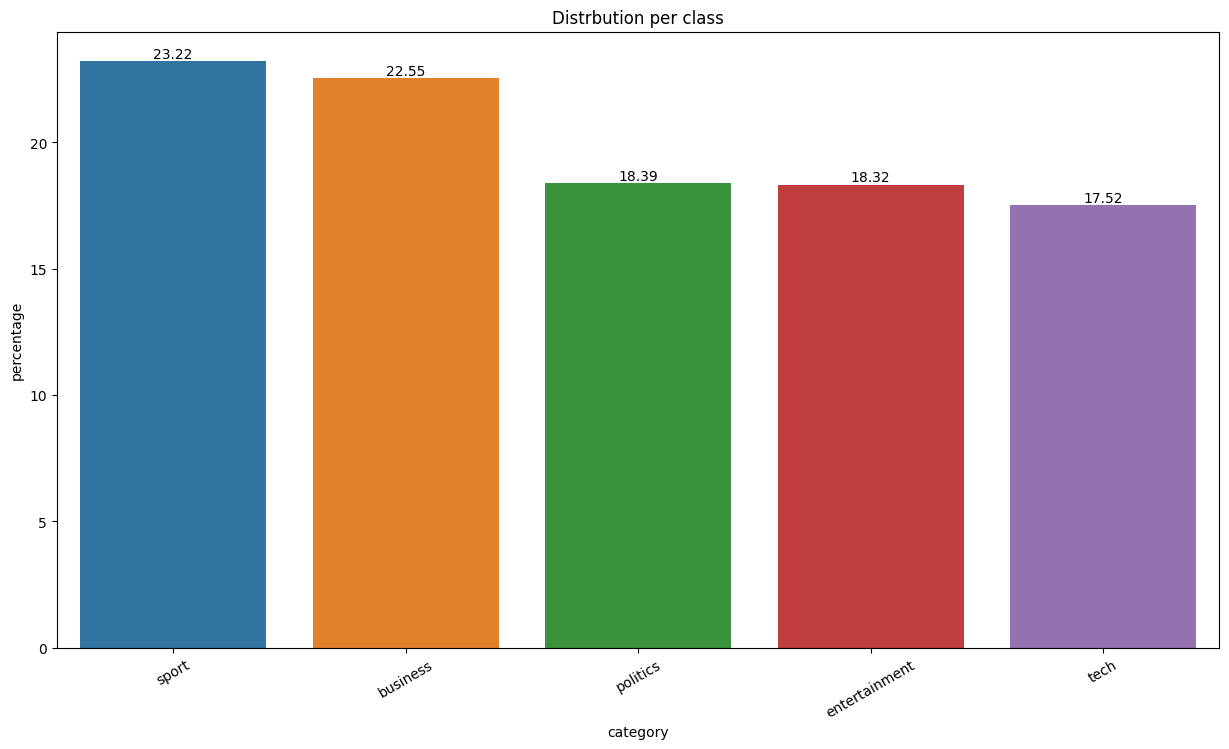

In [8]:
# Get the percentage of every class in the whole training data. 
category_percentage = (100*data.Category.value_counts()/len(data)).to_frame().reset_index()
category_percentage.columns = ['category', 'percentage']


# Visualize the output
plt.figure(figsize=(15,8))
chart = sns.barplot(x='category', y='percentage', data=category_percentage)
chart.set_title('Distrbution per class')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

- We will think more about the number of words (tokens) in every article. number of tokens will really matter espcially in deep learning approaches.

- Articles, in general, in both train and test have the same distrbution of the number of tokens. However, we can expect longer sequences in future data because the test set has some longes sequences.

In [9]:
data['#tokens'] = data['Text'].apply(lambda x : len(x.split()))
data

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  #tokens  
0          business      301  
1          business      325  
2          business      514  
3              tech      634  
4          business      355  
...             ...      ...  
1485  entertainment      223  
1486  entertainment      558  
1487       business      237  
1488           tech      560  
1489           tech      295  

[1490 rows x 4 columns]

<AxesSubplot: title={'center': 'Tokens dist. in training'}, xlabel='#tokens'>

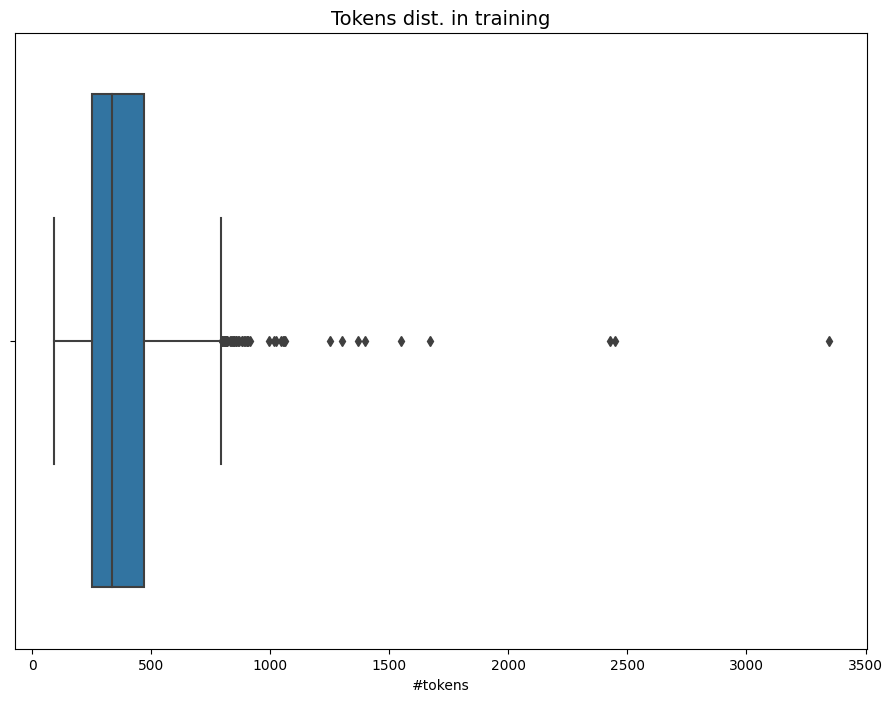

In [11]:
data['#tokens'] = data['Text'].apply(lambda x : len(x.split()))
plt.figure(figsize=(11, 8))
plt.title('Tokens dist. in training', fontdict={'fontsize':14})
sns.boxplot(data=data, x='#tokens')

In [36]:
test_df

ArticleId                                               Text  #tokens
0         1018  qpr keeper day heads for preston queens park r...      156
1         1319  software watching while you work software that...      435
2         1138  d arcy injury adds to ireland woe gordon d arc...      237
3          459  india s reliance family feud heats up the ongo...      309
4         1020  boro suffer morrison injury blow middlesbrough...      135
..         ...                                                ...      ...
730       1923  eu to probe alitalia  state aid  the european ...      286
731        373  u2 to play at grammy awards show irish rock ba...      194
732       1704  sport betting rules in spotlight a group of mp...      374
733        206  alfa romeos  to get gm engines  fiat is to sto...      260
734        471  citizenship event for 18s touted citizenship c...      496

[735 rows x 3 columns]

<AxesSubplot: title={'center': '#tokens dist. in test'}, xlabel='#tokens'>

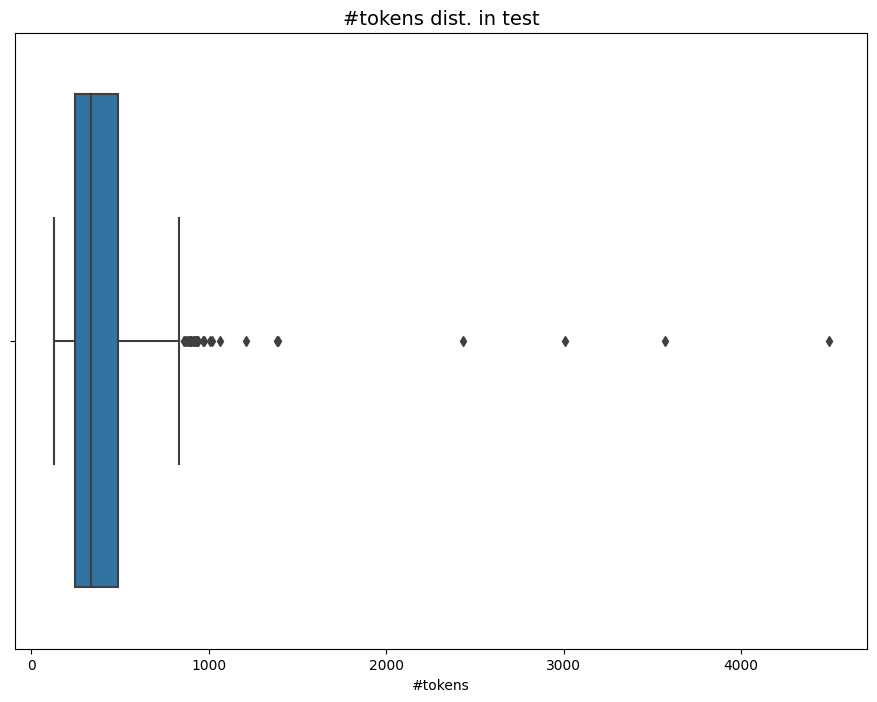

In [34]:
test_df['#tokens'] = test_df['Text'].apply(lambda x : len(x.split()))
plt.figure(figsize=(11, 8))
plt.title('#tokens dist. in test', fontdict={'fontsize':14})
sns.boxplot(data=test_df, x='#tokens')

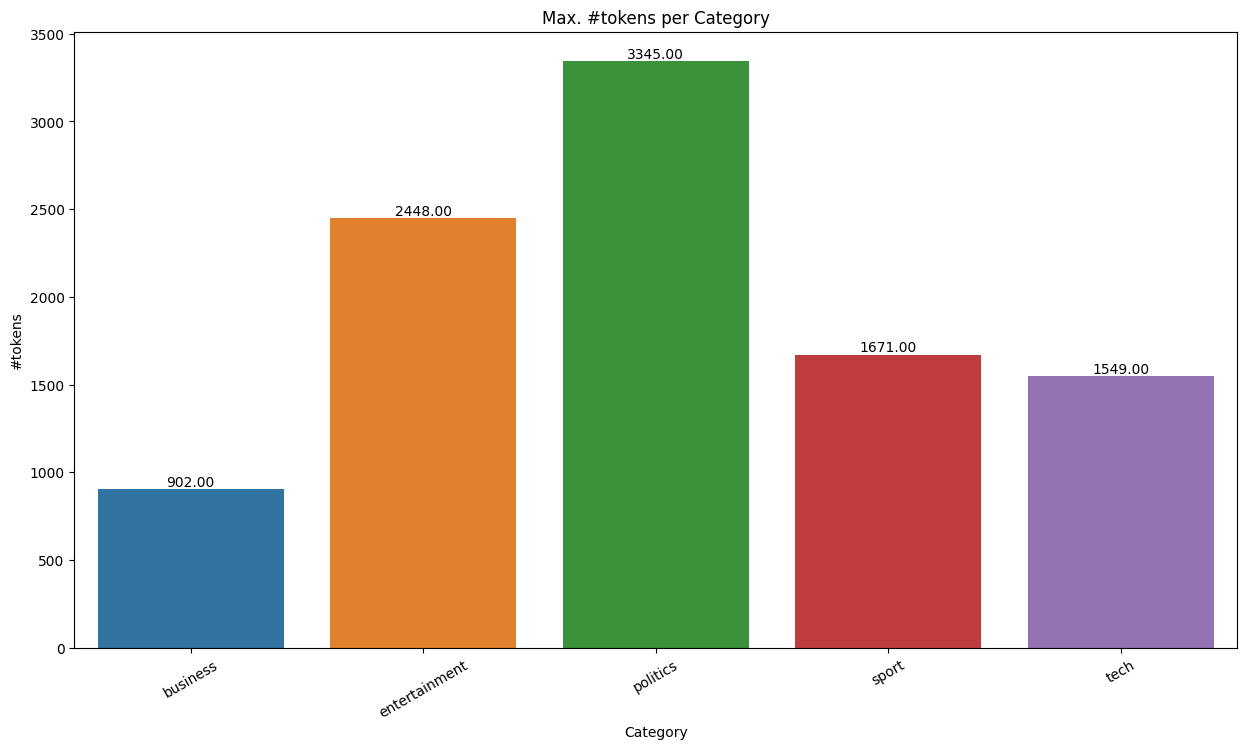

In [12]:
# Generate the summarized dataframe
max_tokens_per_cat = data.groupby('Category')['#tokens'].max().to_frame().reset_index()
# Plot the results
plt.figure(figsize=(15,8))
chart = sns.barplot(x='Category', y='#tokens', data=max_tokens_per_cat)
chart.set_title('Max. #tokens per Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

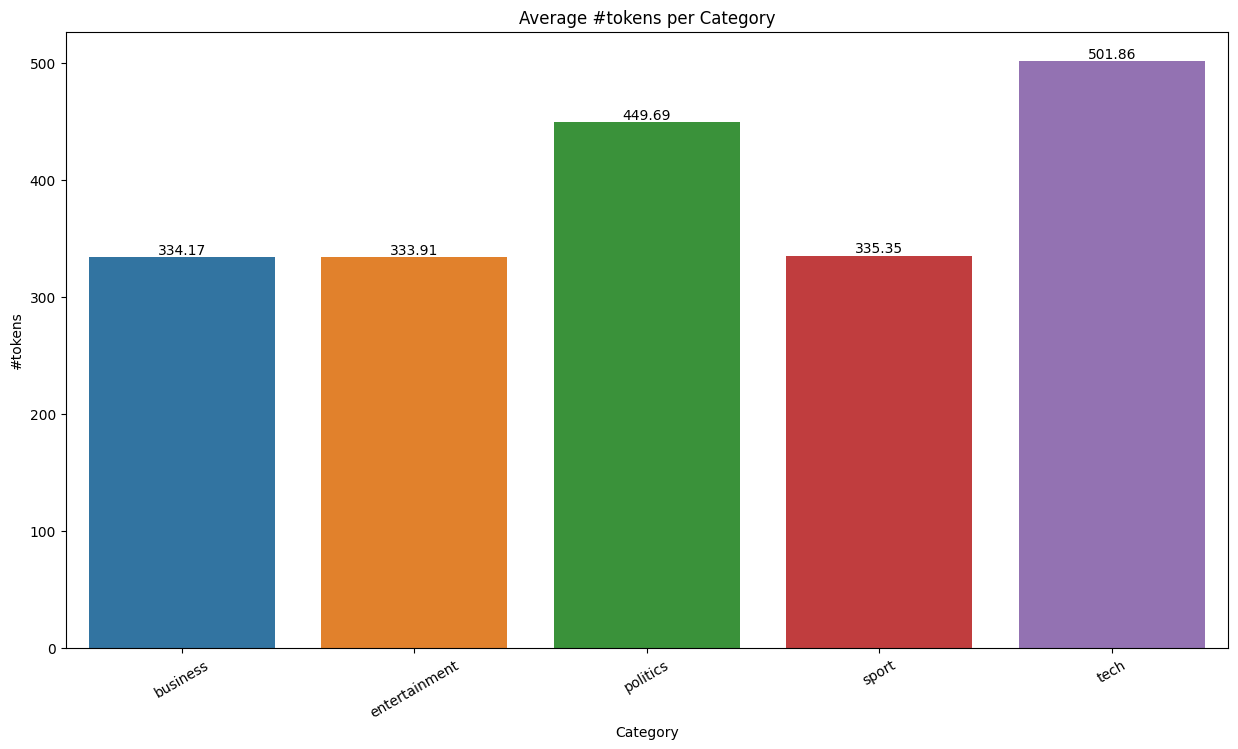

In [13]:
# Generate the summarized dataframe
avg_tokens_per_cat = data.groupby('Category')['#tokens'].mean().to_frame().reset_index()
# Plot results
plt.figure(figsize=(15,8))
chart = sns.barplot(x='Category', y='#tokens', data=avg_tokens_per_cat)
chart.set_title('Average #tokens per Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

In [14]:
data

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  #tokens  
0          business      301  
1          business      325  
2          business      514  
3              tech      634  
4          business      355  
...             ...      ...  
1485  entertainment      223  
1486  entertainment      558  
1487       business      237  
1488           tech      560  
1489           tech      295  

[1490 rows x 4 columns]

In [16]:
data['category_id'] = data['Category'].factorize()[0]

data['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [17]:
category_id_df = data[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [18]:
category_id_df

Category  category_id
0       business            0
3           tech            1
5       politics            2
6          sport            3
7  entertainment            4

In [19]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [20]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [21]:
category_to_id


{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [22]:
data.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

<AxesSubplot: xlabel='Category'>

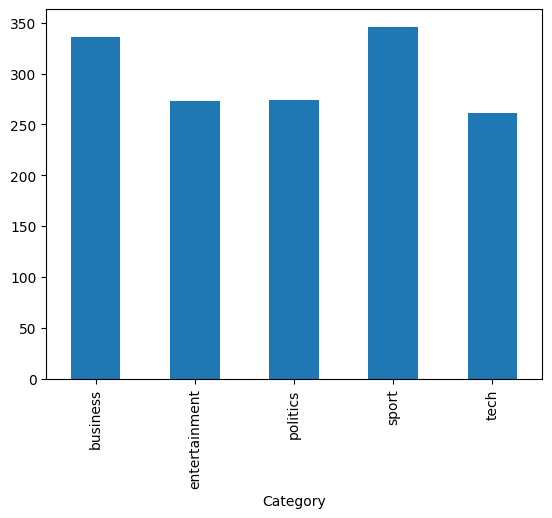

In [23]:
data.groupby('Category').category_id.count().plot.bar(ylim=0)


In [24]:
data

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  #tokens  category_id  
0          business      301            0  
1          business      325            0  
2          business      514            0  
3              tech      634            1  
4          business      355            0  
...             ...      ...          ...  
1485  entertainment      223            4  
1486  entertainment      558            4  
1487       business      237            0  
1488           tech      560            1  
1489           tech      295            1  

[1490 rows x 5 columns]

In [25]:
!pip install WordCloud

You should consider upgrading via the 'c:\users\raksh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [29]:
data

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  #tokens  category_id  
0          business      301            0  
1          business      325            0  
2          business      514            0  
3              tech      634            1  
4          business      355            0  
...             ...      ...          ...  
1485  entertainment      223            4  
1486  entertainment      558            4  
1487       business      237            0  
1488           tech      560            1  
1489           tech      295            1  

[1490 rows x 5 columns]

In [33]:
category_to_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

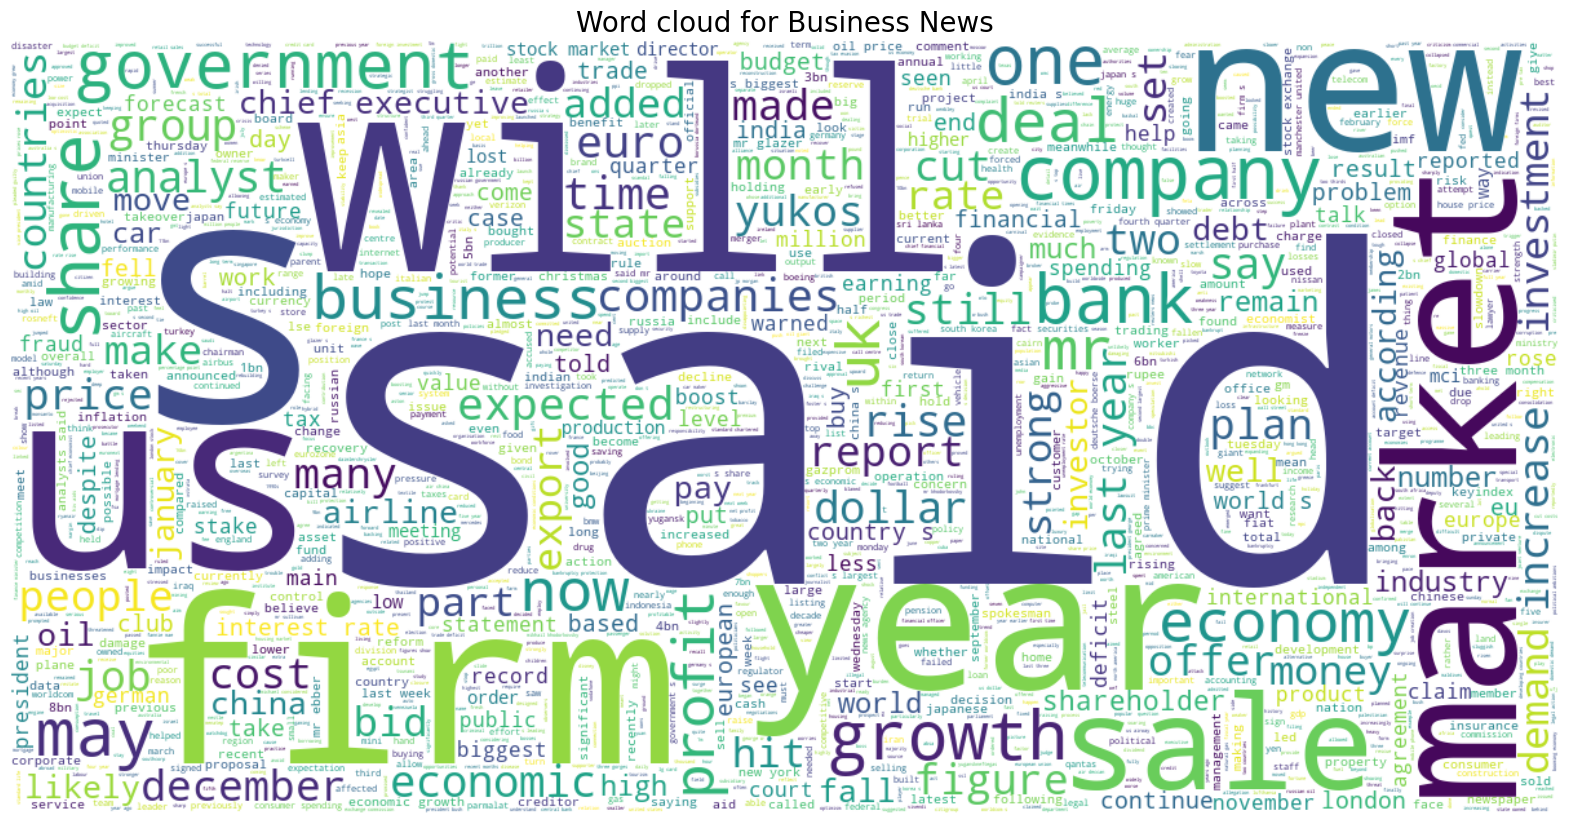

In [36]:
#word cloud for positive reviews
from wordcloud import WordCloud

business_data = data[data.category_id == 0]['Text']
business_data_string = ' '.join(business_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(business_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Business News',fontsize = 20)
plt.show()

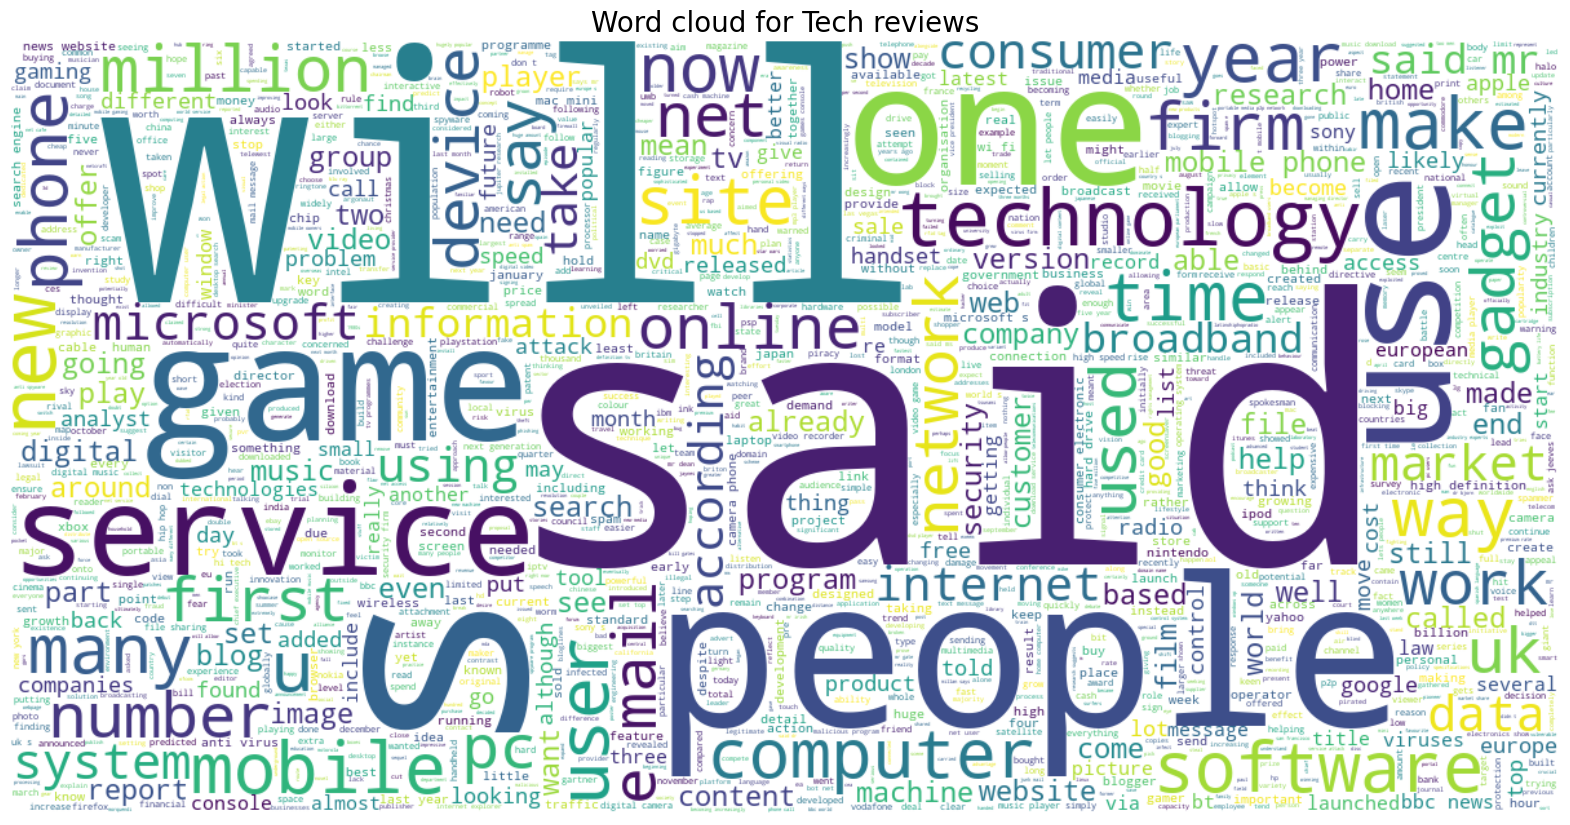

In [32]:
#word cloud for positive reviews
tech_data = data[data.category_id == 1]['Text']
tech_data_string = ' '.join(tech_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(tech_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Tech News',fontsize = 20)
plt.show()

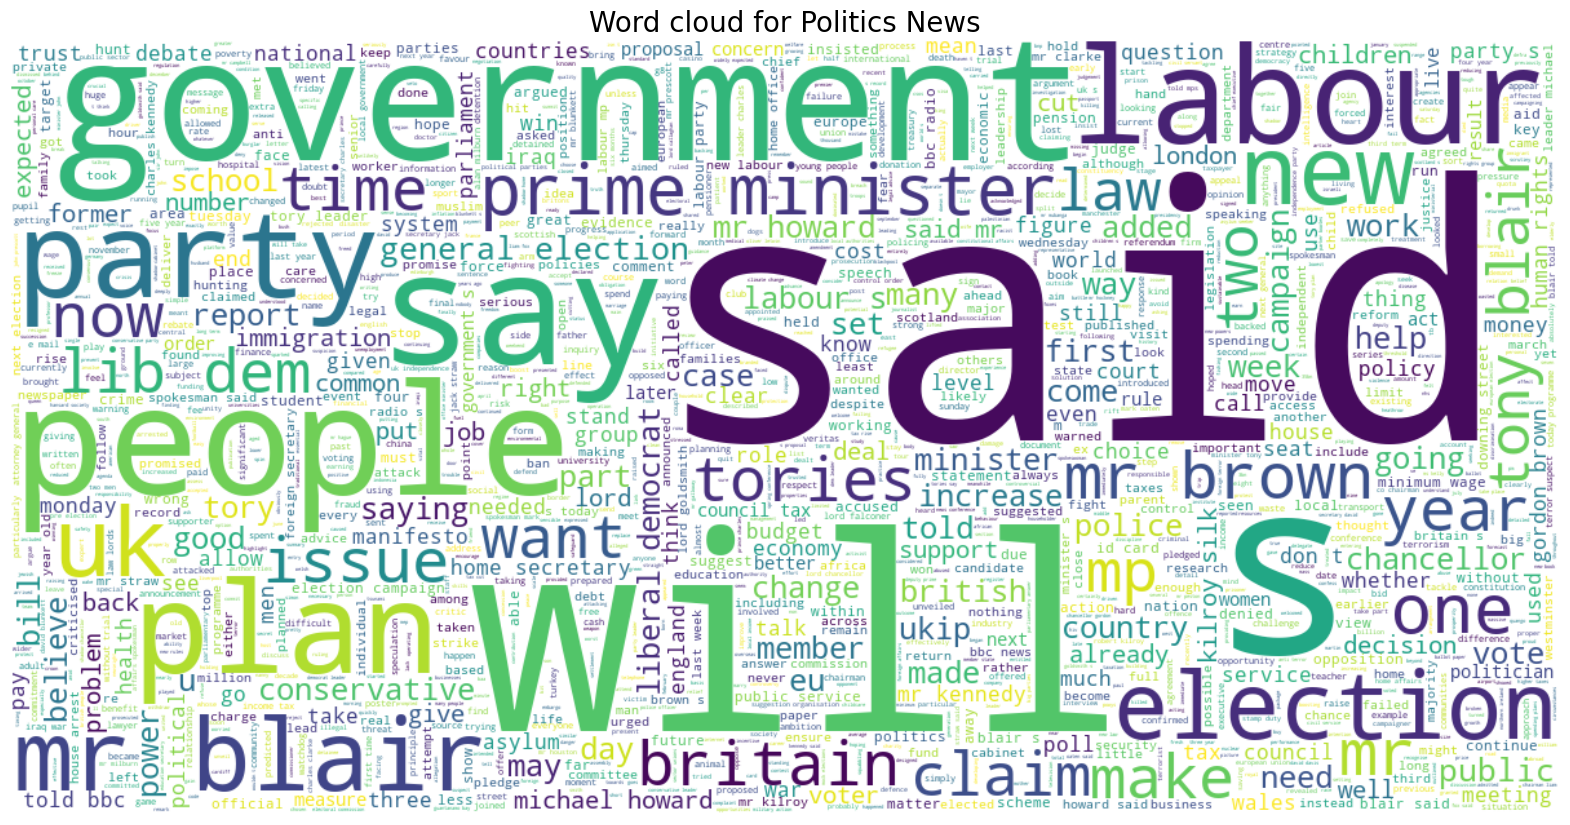

In [39]:
#word cloud for positive reviews
ploitics_data = data[data.category_id == 2]['Text']
ploitics_data_string = ' '.join(ploitics_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(ploitics_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Politics News',fontsize = 20)
plt.show()

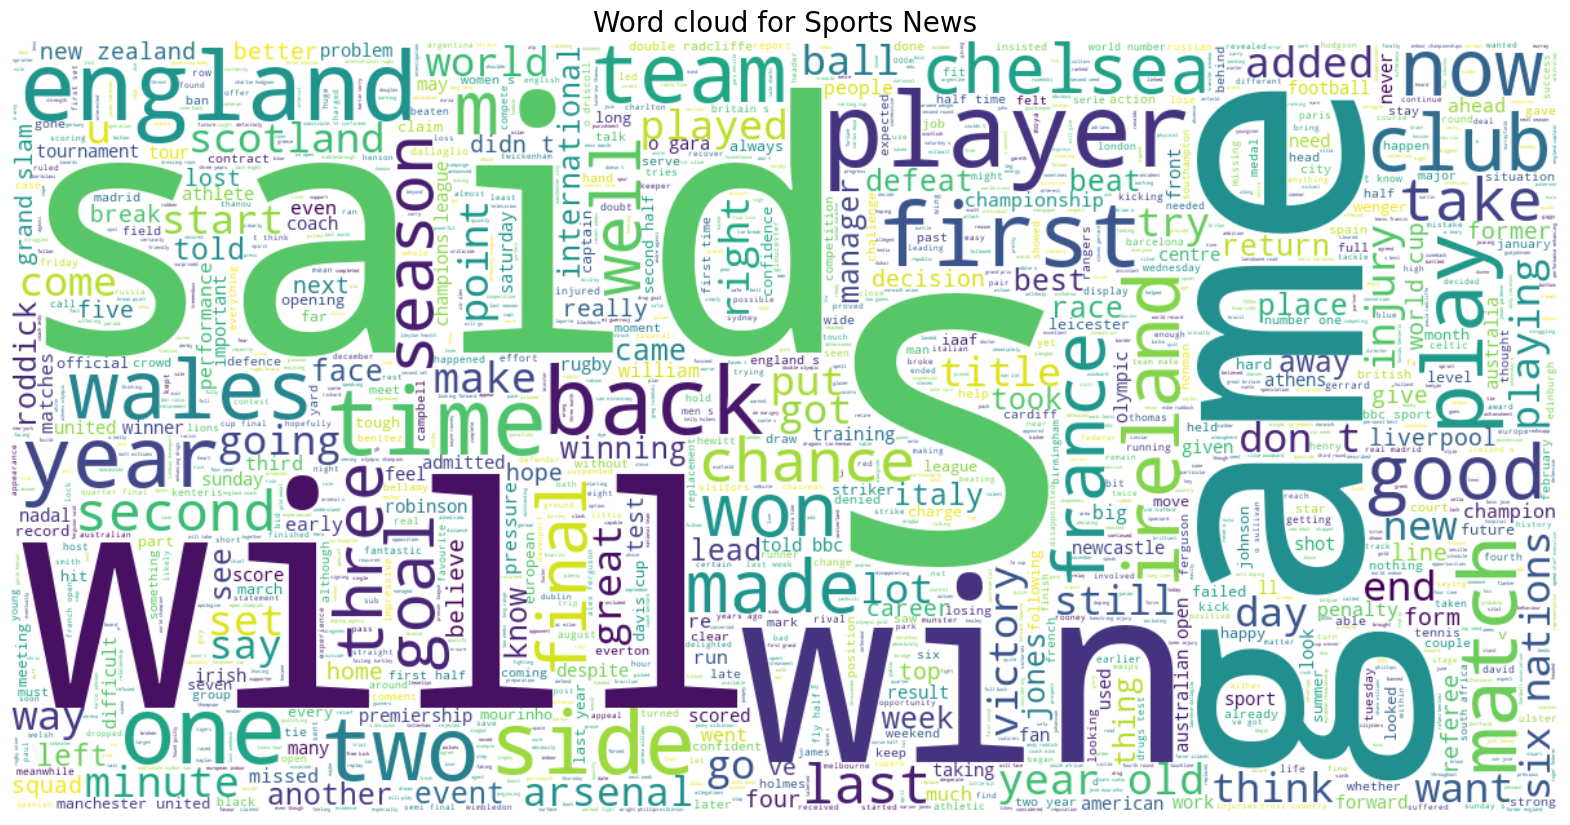

In [38]:
sports_data = data[data.category_id == 3]['Text']
sports_data_string = ' '.join(sports_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(sports_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Sports News',fontsize = 20)
plt.show()

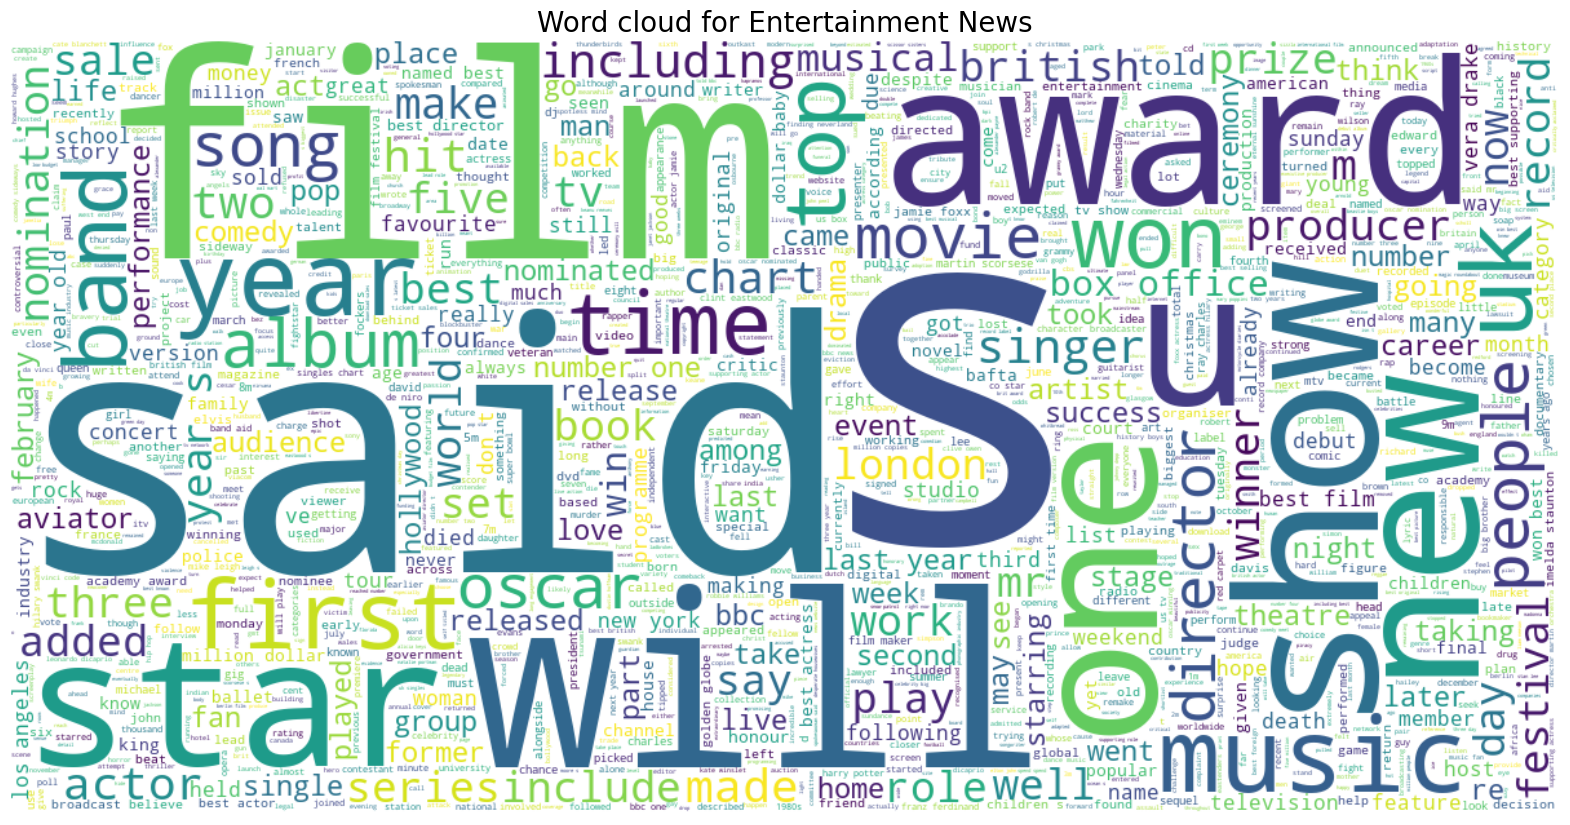

In [44]:
entertainment_data = data[data.category_id == 4]['Text']
entertainment_data_string = ' '.join(entertainment_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(entertainment_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Entertainment News',fontsize = 20)
plt.show()

In [49]:
category_to_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [50]:
print('business reviews are', (round(data['category_id'].value_counts()[0])),'i.e.', round(data['category_id'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('tech reviews are', (round(data['category_id'].value_counts()[1])),'i.e.', round(data['category_id'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
print('politics reviews are', (round(data['category_id'].value_counts()[2])),'i.e.', round(data['category_id'].value_counts()[2]/len(data) * 100,2), '% of the dataset')
print('sport reviews are', (round(data['category_id'].value_counts()[3])),'i.e.', round(data['category_id'].value_counts()[3]/len(data) * 100,2), '% of the dataset')
print('entertainment reviews are', (round(data['category_id'].value_counts()[4])),'i.e.', round(data['category_id'].value_counts()[4]/len(data) * 100,2), '% of the dataset')


business reviews are 336 i.e. 22.55 % of the dataset
tech reviews are 261 i.e. 17.52 % of the dataset
politics reviews are 274 i.e. 18.39 % of the dataset
sport reviews are 346 i.e. 23.22 % of the dataset
entertainment reviews are 273 i.e. 18.32 % of the dataset


In [54]:
null_values = data.isnull().sum() #identifying missing values
null_values

ArticleId      0
Text           0
Category       0
#tokens        0
category_id    0
dtype: int64

In [69]:
num_duplicates = data.Text.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 53 duplicate reviews present in the dataset


In [58]:
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [59]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [63]:
!pip install bs4

  Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


You should consider upgrading via the 'c:\users\raksh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [64]:
from bs4 import BeautifulSoup
import re,string,unicodedata

#function to clean data
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [65]:
data['Text']=data['Text'].apply(clean_text,lemmatize = True)


In [66]:
data

ArticleId                                               Text  \
0          1833  worldcom exboss launch defence lawyer defendin...   
1           154  german business confidence slide german busine...   
2          1101  bbc poll indicates economic gloom citizen majo...   
3          1976  lifestyle governs mobile choice faster better ...   
4           917  enron boss payout eighteen former enron direct...   
...         ...                                                ...   
1485        857  double eviction big brother model caprice holb...   
1486        325  dj double act revamp chart show dj duo jk joel...   
1487       1590  weak dollar hit reuters revenue medium group r...   
1488       1587  apple ipod family expands market apple expande...   
1489        538  santy worm make unwelcome visit thousand websi...   

           Category  #tokens  category_id  
0          business      301            0  
1          business      325            0  
2          business      514            0  
3              tech      634            1  
4          business      355            0  
...             ...      ...          ...  
1485  entertainment      223            4  
1486  entertainment      558            4  
1487       business      237            0  
1488           tech      560            1  
1489           tech      295            1  

[1490 rows x 5 columns]

In [67]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.Text)
corpus[:5]

['worldcom', 'exboss', 'launch', 'defence', 'lawyer']

In [68]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0    said    4839
1      mr    2007
2    year    1853
3   would    1711
4    also    1426
5     new    1334
6  people    1324
7       u    1227
8     one    1191
9   could    1032